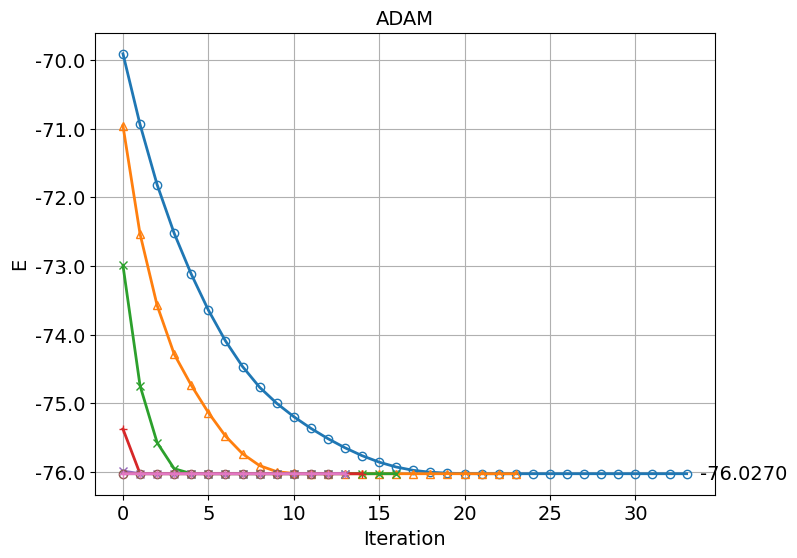

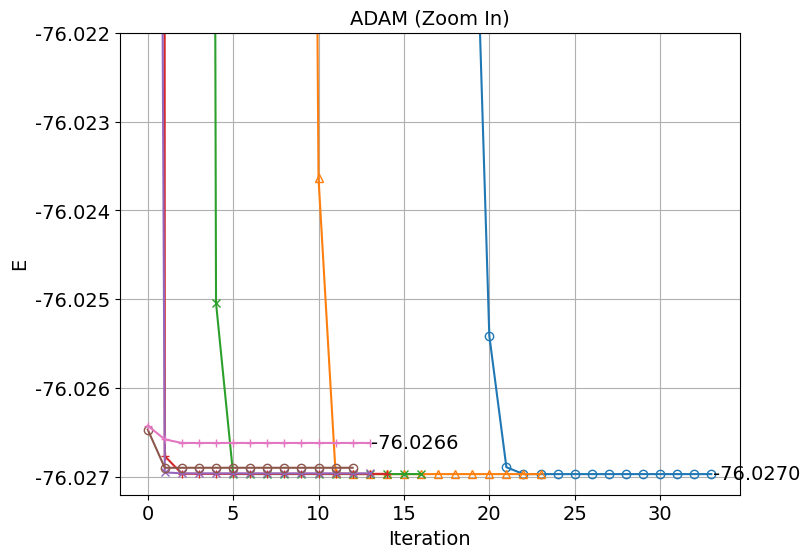

In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter

# Read the data
data = defaultdict(list)  # alpha: list of (iteration, energy)

with open("H2O_ADAM.csv", mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        alpha = float(row['alpha'])
        iteration = int(row['iteration'])
        energy = float(row['energy'])
        data[alpha].append((iteration, energy))


# Plot
# Paso 1: recolectar datos finales
markers = ['o', '^', 'x', '+', 'x', 'o', '+']

# Plot
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

final_energies = []

# Collect final energies

# Plot and optionally show label for selected alphas
for i, (alpha, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none',linewidth=2, label = fr'$\alpha = {alpha}$')

    # Only show label for selected alphas
    if alpha == 0.001:
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')

plt.xlabel('Iteration',fontsize=14)
plt.ylabel('E',fontsize=14)
plt.title('ADAM',fontsize=14)
#plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))
plt.savefig('water_hf_ADAM.png', dpi=300)
plt.show()

####
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

# Plot and optionally show label for selected alphas
for i, (alpha, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none', label=f'alpha = {alpha}')

    # Only show label for selected alphas
    if alpha in ( 0.16, 0.001):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.1, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')

# Etiquetas y configuración general
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('E',fontsize=14)
plt.title('ADAM (Zoom In)',fontsize=14)
#plt.legend()
plt.grid(True)

# Zoom en el eje Y
plt.ylim(-76.0272, -76.022)

# Formato de los ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.3f}"))
#
plt.savefig('water_hf_ADAM_zoom.png', dpi=300)
plt.show()


